# Week3授業課題 信用情報を分析しよう

## 【問題1】コンペティション内容の把握
以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。

* このコンペティションでは何を予測する？目的変数は？
* 企業がこのコンペティションを開催することで得られるメリットは？
* データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？

目的変数はTARGET。審査段階で得られている信用情報から、Defaultを起こす人かどうかを判断するための知見を得られる可能性があったため企業がCompetitionを開催したと思われる。
データセットを見る前に考えられる予測結果に影響しそうな因子としては、年齢、年収、勤続年数などが想定される（高い年収で長く勤めている人の方がDefaultしなそうなイメージがある）。

## 【問題2】データの概観
データの概観を把握してください。

（例）

* .head()、.info()、describe()などを使う
* 欠損値の有無を見る
* クラスごとのデータ数をグラフに出す
* コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。

In [3]:
#データ読み込み
import pandas as pd

df = pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#数値以外の情報が１６カラムある。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
#数値以外の情報にダミーで数字を入れる
df = pd.get_dummies(df, dummy_na=True)

In [6]:
# TARGET == 1の人と0に分けてざっと見てみる。
df.loc[df['TARGET'] == 1, :].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
count,24825.000000,24825.0,24825.000000,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,24825.000000,24825.000000,...,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000
mean,277449.167936,1.0,0.463807,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,0.019131,-14884.828077,42394.675448,...,0.006969,0.003384,0.005438,0.168862,0.193353,0.020947,0.574864,0.447291,0.008983,0.543726
std,102383.123458,0.0,0.756903,7.466770e+05,3.464332e+05,12450.676999,3.116365e+05,0.011905,4192.844583,119484.634253,...,0.083190,0.058072,0.073544,0.374638,0.394936,0.143209,0.494374,0.497224,0.094353,0.498094
min,100002.000000,1.0,0.000000,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,0.000533,-25168.000000,-16069.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189555.000000,1.0,0.000000,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05,0.009630,-18037.000000,-2156.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,276291.000000,1.0,0.000000,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05,0.018634,-14282.000000,-1034.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,366050.000000,1.0,1.000000,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05,0.025164,-11396.000000,-379.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,456254.000000,1.0,11.000000,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06,0.072508,-7678.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#デフォルトしていない人
df.loc[df['TARGET'] == 0, :].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
count,282686.000000,282686.0,282686.000000,2.826860e+05,2.826860e+05,282674.000000,2.824290e+05,282686.000000,282686.000000,282686.000000,...,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000
mean,278244.744536,0.0,0.412946,1.690777e+05,6.026483e+05,27163.623349,5.427368e+05,0.021021,-16138.176397,65696.146123,...,0.007510,0.005996,0.005271,0.218787,0.212303,0.017129,0.502572,0.524695,0.007446,0.467858
std,102825.776954,0.0,0.718843,1.104763e+05,4.068459e+05,14658.307178,3.737855e+05,0.013978,4364.200856,142877.810161,...,0.086335,0.077202,0.072409,0.413424,0.408939,0.129751,0.499994,0.499391,0.085971,0.498967
min,100003.000000,0.0,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189103.250000,0.0,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19793.750000,-2813.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278362.500000,0.0,0.000000,1.485000e+05,5.177880e+05,24876.000000,4.500000e+05,0.018850,-15877.000000,-1235.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,367241.500000,0.0,1.000000,2.025000e+05,8.100000e+05,34749.000000,6.885000e+05,0.028663,-12536.000000,-278.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,456255.000000,0.0,19.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


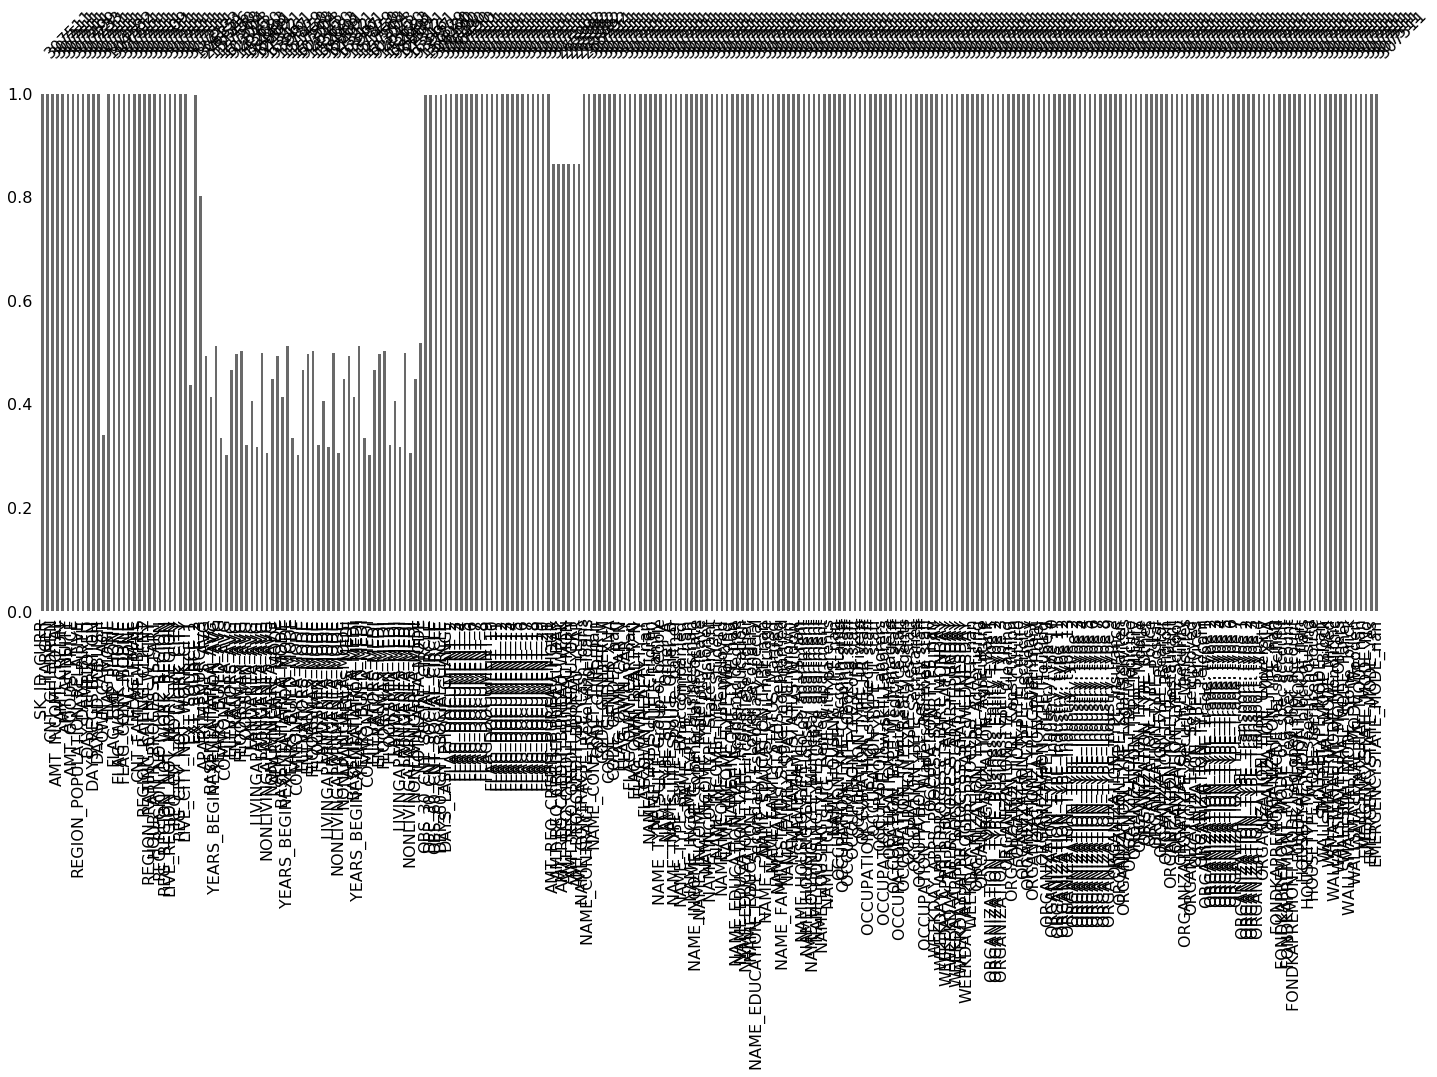

In [8]:
#欠損データの確認
import missingno as msno
%matplotlib inline
msno.bar(df);

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

* とりあえずわからないので、全ての項目のヒストグラムを書いてみる
* 欠損データが著しく多い項目があるのでそれに着目してみる。

## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。過程で新しい疑問点などが生まれた場合は、加えていってください。

課題合格の条件として、表やグラフを 合計15個以上 出力してください。そして、それに対してマークダウンを使い考察を加えていきましょう。

まずは、とりあえず、欠損値を除いてヒストグラムを見てみる

In [9]:
#Column方向のnullの数をカウント

#isnullのTrueの数をカラム毎に数えてndarrayに格納していく
for clm, items in df.isnull().iteritems():
    print("%s:  %d" % (clm, items.sum()))

SK_ID_CURR:  0
TARGET:  0
CNT_CHILDREN:  0
AMT_INCOME_TOTAL:  0
AMT_CREDIT:  0
AMT_ANNUITY:  12
AMT_GOODS_PRICE:  278
REGION_POPULATION_RELATIVE:  0
DAYS_BIRTH:  0
DAYS_EMPLOYED:  0
DAYS_REGISTRATION:  0
DAYS_ID_PUBLISH:  0
OWN_CAR_AGE:  202929
FLAG_MOBIL:  0
FLAG_EMP_PHONE:  0
FLAG_WORK_PHONE:  0
FLAG_CONT_MOBILE:  0
FLAG_PHONE:  0
FLAG_EMAIL:  0
CNT_FAM_MEMBERS:  2
REGION_RATING_CLIENT:  0
REGION_RATING_CLIENT_W_CITY:  0
HOUR_APPR_PROCESS_START:  0
REG_REGION_NOT_LIVE_REGION:  0
REG_REGION_NOT_WORK_REGION:  0
LIVE_REGION_NOT_WORK_REGION:  0
REG_CITY_NOT_LIVE_CITY:  0
REG_CITY_NOT_WORK_CITY:  0
LIVE_CITY_NOT_WORK_CITY:  0
EXT_SOURCE_1:  173378
EXT_SOURCE_2:  660
EXT_SOURCE_3:  60965
APARTMENTS_AVG:  156061
BASEMENTAREA_AVG:  179943
YEARS_BEGINEXPLUATATION_AVG:  150007
YEARS_BUILD_AVG:  204488
COMMONAREA_AVG:  214865
ELEVATORS_AVG:  163891
ENTRANCES_AVG:  154828
FLOORSMAX_AVG:  153020
FLOORSMIN_AVG:  208642
LANDAREA_AVG:  182590
LIVINGAPARTMENTS_AVG:  210199
LIVINGAREA_AVG:  154350
NON

In [10]:
#10000以上欠損のあるColumnは消去する（10000以上欠損があるか、１００程度以下かのどちらかに割れていたので）
#空のndarrayを準備
import numpy as np
null_column = np.empty((0, 1))

for clm, items in df.isnull().iteritems():
    if (items.sum() > 10000):
        null_column = np.append(null_column, np.array([clm]))
print(null_column)

['OWN_CAR_AGE' 'EXT_SOURCE_1' 'EXT_SOURCE_3' 'APARTMENTS_AVG'
 'BASEMENTAREA_AVG' 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG'
 'COMMONAREA_AVG' 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOORSMAX_AVG'
 'FLOORSMIN_AVG' 'LANDAREA_AVG' 'LIVINGAPARTMENTS_AVG' 'LIVINGAREA_AVG'
 'NONLIVINGAPARTMENTS_AVG' 'NONLIVINGAREA_AVG' 'APARTMENTS_MODE'
 'BASEMENTAREA_MODE' 'YEARS_BEGINEXPLUATATION_MODE' 'YEARS_BUILD_MODE'
 'COMMONAREA_MODE' 'ELEVATORS_MODE' 'ENTRANCES_MODE' 'FLOORSMAX_MODE'
 'FLOORSMIN_MODE' 'LANDAREA_MODE' 'LIVINGAPARTMENTS_MODE'
 'LIVINGAREA_MODE' 'NONLIVINGAPARTMENTS_MODE' 'NONLIVINGAREA_MODE'
 'APARTMENTS_MEDI' 'BASEMENTAREA_MEDI' 'YEARS_BEGINEXPLUATATION_MEDI'
 'YEARS_BUILD_MEDI' 'COMMONAREA_MEDI' 'ELEVATORS_MEDI' 'ENTRANCES_MEDI'
 'FLOORSMAX_MEDI' 'FLOORSMIN_MEDI' 'LANDAREA_MEDI' 'LIVINGAPARTMENTS_MEDI'
 'LIVINGAREA_MEDI' 'NONLIVINGAPARTMENTS_MEDI' 'NONLIVINGAREA_MEDI'
 'TOTALAREA_MODE' 'AMT_REQ_CREDIT_BUREAU_HOUR' 'AMT_REQ_CREDIT_BUREAU_DAY'
 'AMT_REQ_CREDIT_BUREAU_WEEK' 'AMT_REQ_CRE

In [11]:
#dropしてdf_1に格納
df_1 = df.drop(null_column, axis=1)

In [12]:
#確認
print(df.shape)#drop前
print(df_1.shape)#drop後

(307511, 262)
(307511, 210)


In [13]:
#drop後もなお欠損のあるrowを消去する
#空のndarrayを準備
null_row = np.empty((0, 1))
#1カラムでも空のものを格納する
for index, item in df_1.isnull().iterrows():
    if(item.any() == True):
        null_row = np.append(null_row, index)

In [14]:
#削除すべき行数1966行
len(null_row)

1966

In [15]:
#削除
df_2 = df_1.drop(null_row, axis=0)

In [16]:
#確認
print(df.shape)#drop前
print(df_1.shape)#カラムのdrop後
print(df_2.shape)#行のdrop後

(307511, 262)
(307511, 210)
(305545, 210)


<bound method Figure.tight_layout of <Figure size 216x60480 with 210 Axes>>

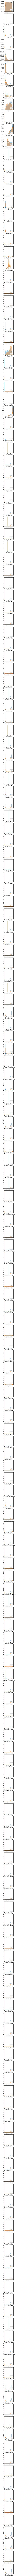

In [24]:
#nullを削除できたので、ヒストグラムを描画
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(df_2.shape[1], 1, figsize = (3, 4*df_2.shape[1]))

for i in range(df_2.shape[1]):
    sns.distplot(df_2.iloc[:, i][df_2['TARGET'] == 1], label='T = 1', ax=axes[i]);
    sns.distplot(df_2.iloc[:, i][df_2['TARGET'] == 0], label='T = 0', ax=axes[i]);
    axes[i].legend(loc='lower right')
    axes[i].set_title('i = %d' % i, loc='right')

fig.tight_layout


T=1 (Defalut)とT=0に見られる差異
* CNT_CHILDREN(i=2)が少ない方がT=1の人が多い
* DAYS_BIRTH(i=8)が大きい人（若い人）の方がT=1が多い
* DAYS_ID_PUBLISH (i=11)が大きい（ローン申込み時に使った身分証明書の発行が最近である人)の方がT=1が多い
* FRAG_PHONE = 1（i=16）の人（家の固定電話の情報を提供した人）にT=1が多い
* CNT_FAM_MEMBERS(i=18)が少ない人（一人暮らし）の人にT=1が多い
* EXT_SOURCE_2(i=28)が小さい方がT=1が多い（外部データソースからの情報を標準化したスコア）

一方、意味から考えた時にlogをとった方が適切と思われるものもあるので(incomeなど)、logをとったプロットも見てみる。

/Users/ohmori/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


Error 8


<bound method Figure.tight_layout of <Figure size 216x60480 with 210 Axes>>

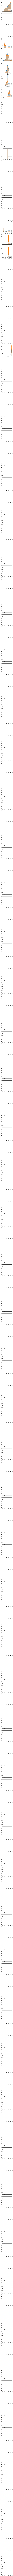

In [84]:
import seaborn as sns
fig, axes = plt.subplots(df_2.shape[1], 1, figsize = (3, 4*df_2.shape[1]))

for i in range(df_2.shape[1]):
    #真数条件より、log_a(x)に対してx>0なので
    if (df_2.iloc[:,i].all() > 0):
        try:
            sns.distplot(np.log(df_2.iloc[:, i])[df_2['TARGET'] == 1], label='T = 1', ax=axes[i]);
            sns.distplot(np.log(df_2.iloc[:, i])[df_2['TARGET'] == 0], label='T = 0', ax=axes[i]);
            axes[i].legend(loc='lower right')
            axes[i].set_title('i = %d' % i, loc='right')
        except:
            print('Error %d' % i)

fig.tight_layout

Logで見た場合で分布に差が出るものは無さそう。

次に、欠損値に関して見てみる。

In [19]:
#行方向にnullをカウント（空欄の情報が多い人を見つける）
isnull_df = df.isnull()
n_of_null = isnull_df.sum(axis=1)

In [20]:
#データフレームに格納。
df['N_OF_NULL'] = n_of_null
#確認
df['N_OF_NULL'].head()

0     1
1     2
2    44
3    52
4    46
Name: N_OF_NULL, dtype: int64

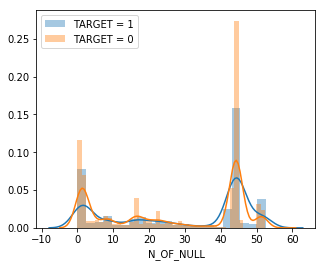

In [21]:
#空欄の数の分布をDefaultの人とそうでない人に分けて表示
#分布にズレはなさそう。
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 1, figsize = (5,4))
sns.distplot(df['N_OF_NULL'][df['TARGET'] == 1], label='TARGET = 1');
sns.distplot(df['N_OF_NULL'][df['TARGET'] == 0], label='TARGET = 0');

plt.legend()

In [56]:
#TARGET = 1で、カラムのitemがnullである比率
null_ratio_1 = isnull_df.loc[df['TARGET'] == 1, :].sum()/((df['TARGET'] == 1).sum())

In [57]:
#TARGET = 0で、カラムのitemがnullである比率
null_ratio_0 = isnull_df.loc[df['TARGET'] == 0, :].sum()/((df['TARGET'] == 0).sum())

In [87]:
null_ratio_0

SK_ID_CURR                                  0.000000
TARGET                                      0.000000
CNT_CHILDREN                                0.000000
AMT_INCOME_TOTAL                            0.000000
AMT_CREDIT                                  0.000000
AMT_ANNUITY                                 0.000042
AMT_GOODS_PRICE                             0.000909
REGION_POPULATION_RELATIVE                  0.000000
DAYS_BIRTH                                  0.000000
DAYS_EMPLOYED                               0.000000
DAYS_REGISTRATION                           0.000000
DAYS_ID_PUBLISH                             0.000000
OWN_CAR_AGE                                 0.656842
FLAG_MOBIL                                  0.000000
FLAG_EMP_PHONE                              0.000000
FLAG_WORK_PHONE                             0.000000
FLAG_CONT_MOBILE                            0.000000
FLAG_PHONE                                  0.000000
FLAG_EMAIL                                  0.

In [88]:
null_ratio_1

SK_ID_CURR                                  0.000000
TARGET                                      0.000000
CNT_CHILDREN                                0.000000
AMT_INCOME_TOTAL                            0.000000
AMT_CREDIT                                  0.000000
AMT_ANNUITY                                 0.000000
AMT_GOODS_PRICE                             0.000846
REGION_POPULATION_RELATIVE                  0.000000
DAYS_BIRTH                                  0.000000
DAYS_EMPLOYED                               0.000000
DAYS_REGISTRATION                           0.000000
DAYS_ID_PUBLISH                             0.000000
OWN_CAR_AGE                                 0.694824
FLAG_MOBIL                                  0.000000
FLAG_EMP_PHONE                              0.000000
FLAG_WORK_PHONE                             0.000000
FLAG_CONT_MOBILE                            0.000000
FLAG_PHONE                                  0.000000
FLAG_EMAIL                                  0.

In [92]:
#値が正なら、TARGET=1の方がNullが多い。
#これらの項目にNULLが多い人はDefaultの確率が高いと言えるかも
(null_ratio_1- null_ratio_0)[(null_ratio_1- null_ratio_0) > 0.0]

OWN_CAR_AGE                     0.037982
EXT_SOURCE_1                    0.033934
EXT_SOURCE_3                    0.033100
APARTMENTS_AVG                  0.073896
BASEMENTAREA_AVG                0.066229
YEARS_BEGINEXPLUATATION_AVG     0.074410
YEARS_BUILD_AVG                 0.054464
COMMONAREA_AVG                  0.047202
ELEVATORS_AVG                   0.073804
ENTRANCES_AVG                   0.075015
FLOORSMAX_AVG                   0.074970
FLOORSMIN_AVG                   0.051031
LANDAREA_AVG                    0.059758
LIVINGAPARTMENTS_AVG            0.050519
LIVINGAREA_AVG                  0.072324
NONLIVINGAPARTMENTS_AVG         0.047775
NONLIVINGAREA_AVG               0.071503
APARTMENTS_MODE                 0.073896
BASEMENTAREA_MODE               0.066229
YEARS_BEGINEXPLUATATION_MODE    0.074410
YEARS_BUILD_MODE                0.054464
COMMONAREA_MODE                 0.047202
ELEVATORS_MODE                  0.073804
ENTRANCES_MODE                  0.075015
FLOORSMAX_MODE  

In [93]:
#値が負ならTARGET=0の方がNullが多い
#絶対値から見て、こちらにはあまり差がない
(null_ratio_1- null_ratio_0)[(null_ratio_1- null_ratio_0) < 0.0]

AMT_ANNUITY                -0.000042
AMT_GOODS_PRICE            -0.000063
CNT_FAM_MEMBERS            -0.000007
EXT_SOURCE_2               -0.000056
OBS_30_CNT_SOCIAL_CIRCLE   -0.002034
DEF_30_CNT_SOCIAL_CIRCLE   -0.002034
OBS_60_CNT_SOCIAL_CIRCLE   -0.002034
DEF_60_CNT_SOCIAL_CIRCLE   -0.002034
DAYS_LAST_PHONE_CHANGE     -0.000004
dtype: float64

## 【問題5】（アドバンス課題）カーネルへの投稿
Kaggleのカーネルに今回行ったEDAを投稿してみましょう。英語の文章を書くことが難しい場合は、機械翻訳サービスを活用するなどでも構いません。